# Trabalho 4 - Tópicos Especiais em Informática

Título: **ANÁLISE DE DADOS SOBRE USINAS ELÉTRICAS NO MUNDO**

## Dados do curso
- Curso: 3º Informática
- Disciplina: Tópicos Especiais em Informática
- Ano: 2021
- Professor: Darlon Vasata

## Dados do aluno
- Nome: Gregor Umbelino

# Introdução

  A energia elétrica é um dos recursos mais valiosos na sociedade atual, ela permite o funcionamento de diversos artigos tecnológicos extremamente úteis desenvolvidos desde o final do século XIX (dezenove), mas o problema reside na obtenção dessa energia.  

  A geração desse bem se dá por meio de usinas, sistemas onde geralmente uma força ou combustível age diretamente ou indiretamente sobre uma turbina, que então transforma a energia cinética em energia elétrica.  
  
  Entretanto, parte das usinas usam a queima de combustíveis fósseis para geração de energia, modalidade essa que gera muito dióxido de carbono (CO2) como subproduto, que por sua vez é um gás que contribui para o efeito estufa e o aquecimento global.

# Objetivos

Analisar alguns dados obtidos através da base de dados escolhida ([Global Power Plant Database](https://datasets.wri.org/dataset/globalpowerplantdatabase)) para entender melhor a situação energética do mundo. Entre as análises feitas serão analisados:  
* O número de usinas por país
* A geração média estimada de cada tipo de usina
* A porcentagem de usinas limpas e usinas sujas

# Materiais e métodos

Para execução do trabalho foram usadas as seguintes ferramentas:  
* Google Colaboratory
* Jupyter
* Python 3.7.12
* Google Drive  

No caso da linguagem Python, foram usadas as seguintes bibliotecas:  
* Pandas
* NumPy
* Seaborn
* MatPlotLib
* Geopandas
* Geobr
* Google Colab

Segue o passo a passo:  
1. As bibliotecas foram instaladas e instanciadas no código  
2. Um arquivo .csv que contém o DataFrame foi enviado ao Google Drive
3. O arquivo foi acessado pelo código através da biblioteca do Google Colab para Python
4. O primeiro gráfico usou o Geopandas e o MatPlotLib para fazer um mapa de calor (*Heatmap*) que indica a quantidade de usinas de todos os países do mapa
5. O segundo gráfico usou o Seaborn e o MatPlotLib para fazer um gráfico de barras que mostra a geração média estimada de energia (em Gigawatts) de 2017 de cada tipo de usina. Alguns tipos de usina não possuíam a estimativa, então foram deixados de fora do gráfico
6. O terceiro gráfico é um "gráfico de pizza" (*pie chart*) que usou NumPy, Pandas e MatPlotLib. Através da filtração, criação e atualização de DataFrames foi possível produzir o gráfico

# Desenvolvimento

In [ ]:
%%bash
#Instalação das bibliotecas
pip3 install geopandas
pip3 install geobr

In [ ]:
#Bibliotecas

import geopandas as gpd
import geobr

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
%matplotlib inline

In [ ]:
#Drive

drive.mount('/drive')
database_path = '/drive/MyDrive/Databases/global_power_plant_database.csv'

df = pd.read_csv(database_path, sep = ',', encoding = 'UTF-8')

In [ ]:
#Gráfico 1
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world['power_plants'] = 0

usinas_contadas = df['country'].value_counts()
for i in usinas_contadas.index:
  j = world['iso_a3'] == i
  world.loc[j, 'power_plants'] = usinas_contadas[i]

vmin = world['power_plants'].min()
vmax = world['power_plants'].max()
cmap = 'viridis'



/usr/local/lib/python3.7/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/usr/local/lib/python3.7/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  aout[:] = out


In [ ]:
#Gráfico 2

dfA = df[df['primary_fuel'] != 'Biomass']
dfA = dfA[dfA['primary_fuel'] != 'Cogeneration']
dfA = dfA[dfA['primary_fuel'] != 'Petcoke']
dfA = dfA[dfA['primary_fuel'] != 'Storage']
dfA = dfA[dfA['primary_fuel'] != 'Wave and Tidal']
dfA['estimated_generation_gwh_2017'] = dfA['estimated_generation_gwh_2017'].astype(float)
dfA = dfA.groupby(['primary_fuel'])['estimated_generation_gwh_2017'].mean()
dfA = dfA.to_frame()
dfA.reset_index(inplace=True)

In [ ]:
#Gráfico 3

dfB = df['primary_fuel'].value_counts().to_frame()
dfB.reset_index(inplace=True)

dfC = dfB[dfB['index'] != 'Solar']
dfC = dfC[dfC['index'] != 'Hydro']
dfC = dfC[dfC['index'] != 'Wind']
dfC = dfC[dfC['index'] != 'Biomass']
dfC = dfC[dfC['index'] != 'Waste']
dfC = dfC[dfC['index'] != 'Nuclear']
dfC = dfC[dfC['index'] != 'Geothermal']
dfC = dfC[dfC['index'] != 'Cogeneration']
dfC = dfC[dfC['index'] != 'Wave and Tidal']
dfC = dfC[dfC['index'] != 'Storage']
dfC = dfC[dfC['index'] != 'Other']

dfD = dfB[dfB['index'] != 'Gas']
dfD = dfD[dfD['index'] != 'Coal']
dfD = dfD[dfD['index'] != 'Oil']
dfD = dfD[dfD['index'] != 'Petcoke']
dfD = dfD[dfD['index'] != 'Storage']
dfD = dfD[dfD['index'] != 'Other']

dfE = dfB[dfB['index'] != 'Solar']
dfE = dfE[dfE['index'] != 'Hydro']
dfE = dfE[dfE['index'] != 'Wind']
dfE = dfE[dfE['index'] != 'Biomass']
dfE = dfE[dfE['index'] != 'Waste']
dfE = dfE[dfE['index'] != 'Nuclear']
dfE = dfE[dfE['index'] != 'Geothermal']
dfE = dfE[dfE['index'] != 'Cogeneration']
dfE = dfE[dfE['index'] != 'Wave and Tidal']
dfE = dfE[dfE['index'] != 'Gas']
dfE = dfE[dfE['index'] != 'Coal']
dfE = dfE[dfE['index'] != 'Oil']
dfE = dfE[dfE['index'] != 'Petcoke']

data = np.array([['','tipo','quantidade'],
                ['0','Limpa',dfD['primary_fuel'].sum()],
                ['1','Suja',dfC['primary_fuel'].sum()]])

dfF = pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:])

dfF = dfF.append({'tipo': 'Outra', 'quantidade': dfE['primary_fuel'].sum()}, ignore_index=True)



# Resultados e discussões

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


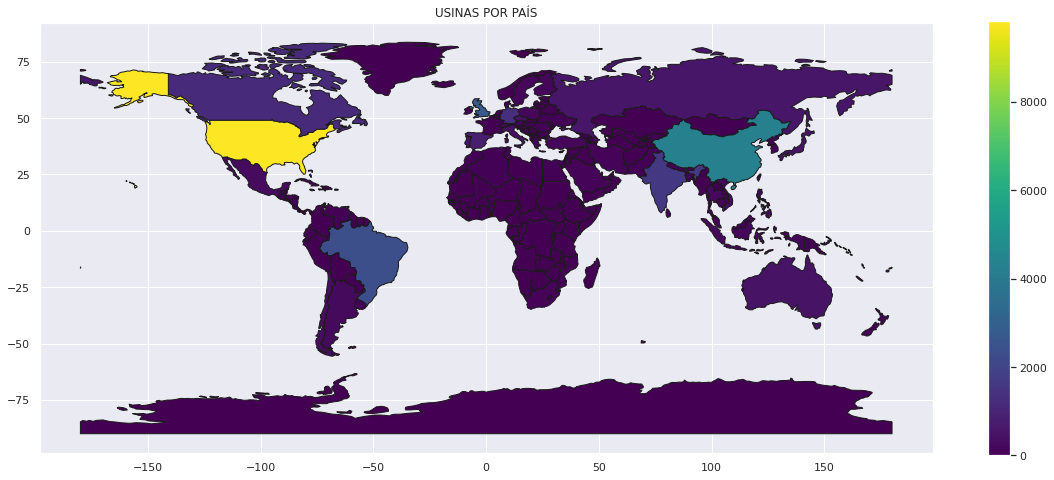

In [ ]:
fig, ax = plt.subplots(1, figsize = (20,8) )

world.plot(column='power_plants',ax = ax, edgecolor = 'k', linewidth = 1, cmap = cmap)

sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
plt.title('USINAS POR PAÍS')
cbar = fig.colorbar(sm)


Primeiro Gráfico: Aqui vemos um mapa de calor, conforme a barra colorida ao lado, quanto mais perto do amarelo, mais usinas o país em questão tem, porém quanto mais perto do roxo, menos usinas o país tem. Ele nos dá uma noção de quantas usinas existem e como elas estão distribuídas.  
O motivo de grande parte do mapa ser roxo é que os Estados Unidos possuem muitas usinas, o que acaba mascarando um pouco os outros países.

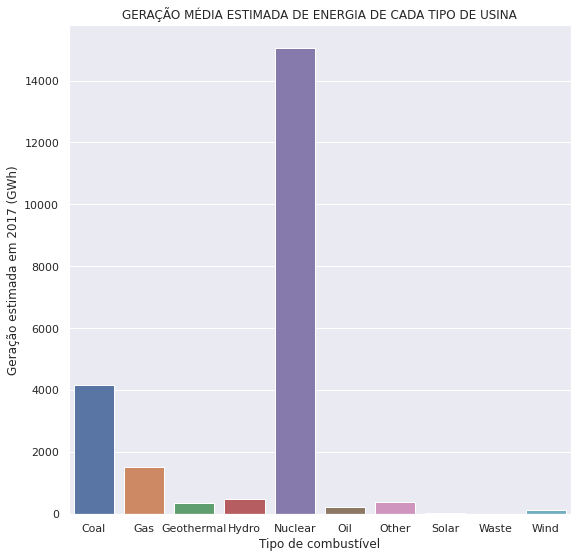

In [ ]:
sns.set(rc={'figure.figsize':(9,9)})
fig = sns.barplot(x='primary_fuel', y='estimated_generation_gwh_2017', data=dfA)
plt.xlabel("Tipo de combustível")
plt.ylabel("Geração estimada em 2017 (GWh)")
plt.title('GERAÇÃO MÉDIA ESTIMADA DE ENERGIA DE CADA TIPO DE USINA')
plt.show(fig)

Segundo Gráfico: Aqui vemos um gráfico de barras, no eixo vertical temos a média da estimativa de geração de 2017 (em Gigawatts), no eixo horizontal temos os tipos de força ou combustível que a usina usa. Alguns tipos foram deixados de fora do gráfico.  
Ele denota o quão energéticas as usinas nucleares são, apesar de não produzirem muito CO2, o subproduto delas é mais perigoso por ter caráter radioativo que se prolonga por décadas. Podem ser uma opção para combater o aquecimento global.  
Usinas que usam a combustão de carvão e gases também geram bastante, mas a emissão de CO2 é bem maior.

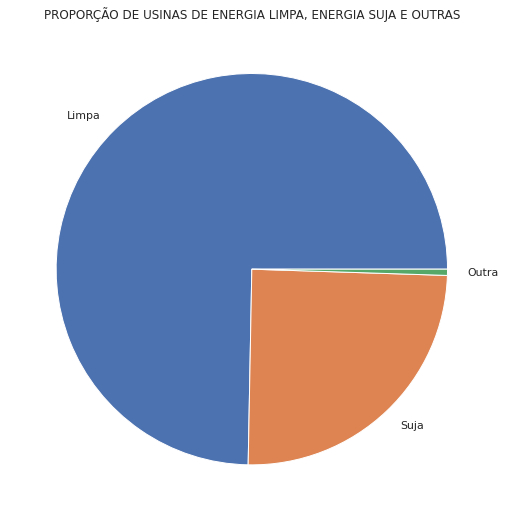

In [ ]:
plt.pie(dfF['quantidade'], labels = dfF['tipo'])
plt.title('PROPORÇÃO DE USINAS DE ENERGIA LIMPA, ENERGIA SUJA E OUTRAS')
plt.show()

Terceiro Gráfico: Aqui temos um gráfico de pizza (*pie chart*) que mostra a proporção de usinas limpas, usinas sujas e outras.  
Apesar de existirem mais usinas limpas do que sujas, a emissão de CO2 dessas usinas poluentes é muito grande. A quantidade dessas usinas deve ser reduzida para deixar o planeta mais sustentável, o problema é que essas usinas são necessárias por enquanto pois produzem muita energia. Espera-se que as tecnologias de geração de energia evoluam para produzir grandes quantidades de energia limpa.

# Conclusão

Após as análises dos gráficos temos que:  
* O mundo tem muitas usinas mas elas estão mais concentradas em países como Estados Unidos, China, Reino Unido e Brasil
* A energia nuclear é bem produtiva mas tem subprodutos muito prejudicial
* Apesar de não serem maioria, as usinas poluentes são grandes fomentadores do aquecimento global

# Referências

[*TWIDELL, J. Biomass energy. Renewable Energy World, v. 1, 1998.*](https://www.osti.gov/etdeweb/biblio/305814)  

[*WESTWOOD, Adam. Ocean power: Wave and tidal energy review. Refocus, v. 5, n. 5, p. 50-55, 2004.*](https://www.sciencedirect.com/science/article/pii/S1471084604002264?casa_token=UB0EabfIXEIAAAAA:-2e0q5m7xc1aKBbPxkpbQ7xeIYNWLYSoL2dr-mqtkZ_2SJUBaaD2WWa27OlQgIi7khf8I5fVtzmFNg)  

[*KHALIL, Munawar et al. Waste to energy technology: The potential of sustainable biogas production from animal waste in Indonesia. Renewable and Sustainable Energy Reviews, v. 105, p. 323-331, 2019.*](https://www.sciencedirect.com/science/article/pii/S1364032119301042?casa_token=yp1uFLb_Kd0AAAAA:9HM3tJ2sb50o_Owu5AYxXla7btgTBJNo73qnczwMmQQjcuRRDYDEc4X3QO0UoiGpU0epGo1c6yE2YQ)

[*FREELA, D. Markdown – Um guia para iniciantes. Produtive.me, 2019.*](https://produtive.me/guia/markdown-um-guia-para-iniciantes/)  

[*WORLD RESOURCES INSTITUTE. World Resources Institute, Creative Commons 2021. Global Power Plant Database. Disponível em: <https://datasets.wri.org/dataset/globalpowerplantdatabase>. Acesso em: 5 de dez. de 2021.*](https://datasets.wri.org/dataset/globalpowerplantdatabase)  

[*NumPy community. NumPy, c2021. NumPy Reference. Disponível em: <https://numpy.org/doc/stable/reference/>. Acesso em: 5 de dez. de 2021.*](https://numpy.org/doc/stable/reference/)

[*Pandas Development Team. Pandas, c2021. API reference. Disponível em: <https://pandas.pydata.org/pandas-docs/stable/reference/index.html>. Acesso em: 5 de dez. de 2021.*](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)  

[*Matplotlib Development Team. Matplotlib, c2012. API reference. Disponível em: <https://matplotlib.org/stable/api/index.html>. Acesso em: 5 de dez. de 2021.*](https://matplotlib.org/stable/api/index.html)  

[*Michael Waskom. Seaborn, c2021. API reference. Disponível em: <https://seaborn.pydata.org/api.html>. Acesso em: 5 de dez. de 2021.*](https://seaborn.pydata.org/api.html)

[*GeoPandas Developers. GeoPandas, c2021. API Reference. Disponível em: <https://geopandas.org/en/stable/docs/reference.html>. Acesso em: 5 de dez. de 2021.*](https://geopandas.org/en/stable/docs/reference.html)